In [169]:
pip install pandas numpy matplotlib seaborn scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.


In [171]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [119]:
# Cargar el dataset
dataset_path = r"C:\Users\Usuario\OneDrive\Documentos\Cursos UNAD\Cursos UNAD 5\ANÁLISIS DE DATOS\Anexo 5 - Dataset Mall Customer Segmentation\Mall_Customers.csv"
df = pd.read_csv(dataset_path)

In [121]:
# Paso 1: Análisis exploratorio de datos (EDA)
df.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [123]:
print("\nDescripción estadística:")
print(df.describe())


Descripción estadística:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


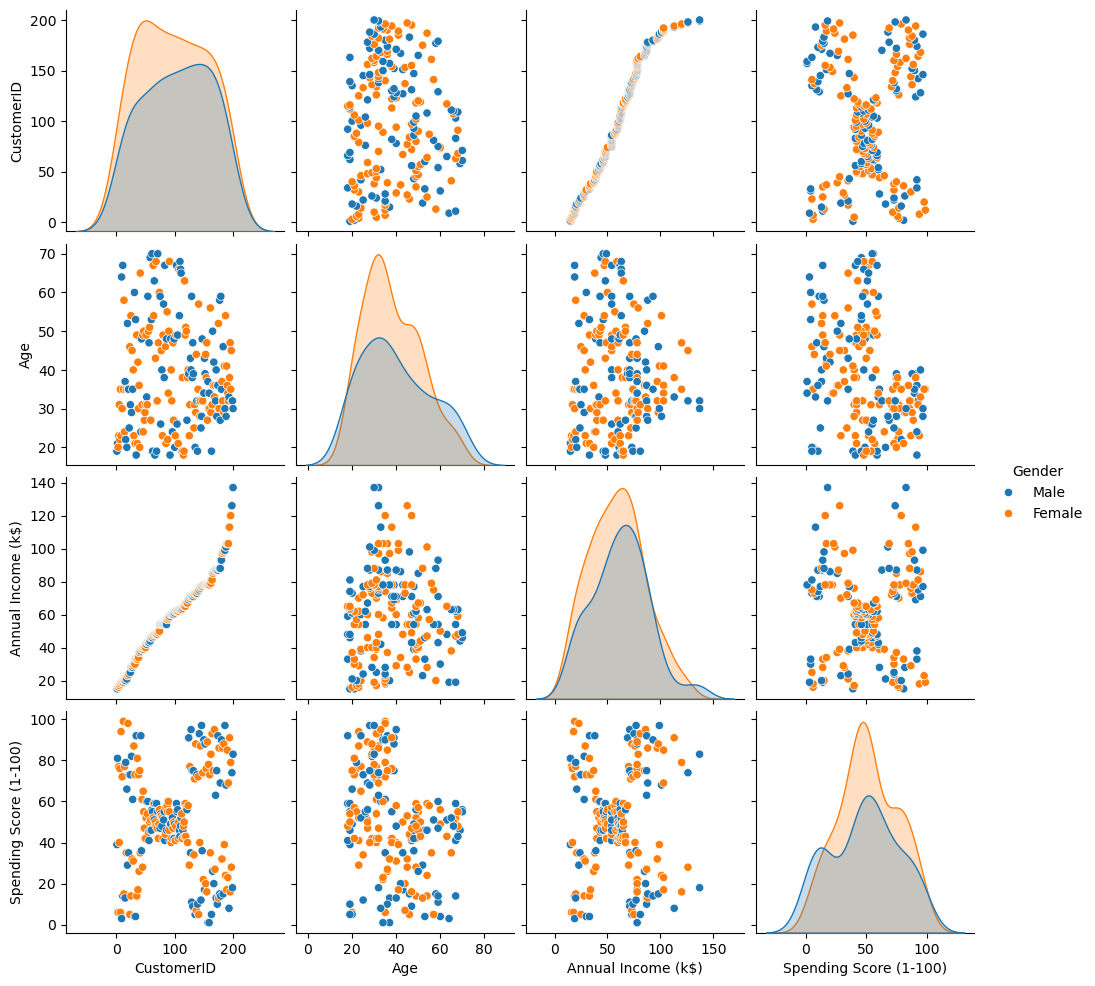

In [125]:
# Visualización de la distribución de variables
sns.pairplot(df, hue="Gender", diag_kind="kde")
plt.show()

In [127]:
# Comprobar valores nulos
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [129]:
# Paso 2: Preprocesamiento de datos
# Convertir la columna "Gender" en valores numéricos
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [131]:
# Normalizar las variables numéricas
scaler = StandardScaler()
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [155]:
# Paso 3: Selección de características
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

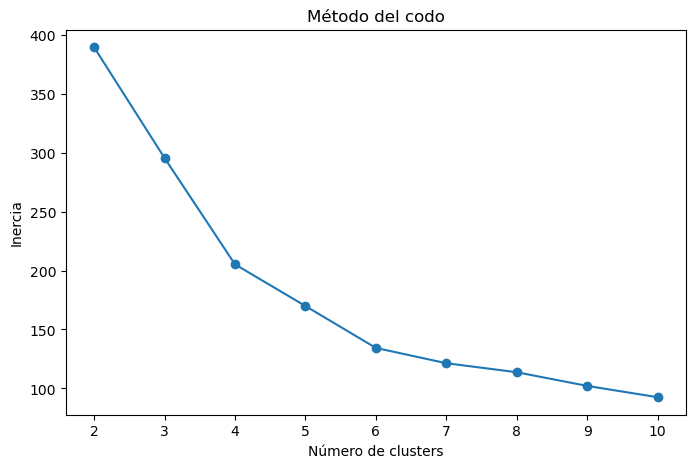

In [173]:
# Paso 4: Entrenar el modelo (K-Means)
# Encontrar el número óptimo de clusters usando el método del codo
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.show()

In [175]:
# Entrenar K-Means con el número óptimo de clusters
optimal_k = 5  # Según el método del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

In [139]:
# Paso 5: Evaluación del modelo
silhouette_avg = silhouette_score(X, kmeans_labels)
calinski_harabasz = calinski_harabasz_score(X, kmeans_labels)
print(f"K-Means - Coeficiente de Silhouette: {silhouette_avg}")
print(f"K-Means - Índice de Calinski-Harabasz: {calinski_harabasz}")

K-Means - Coeficiente de Silhouette: 0.40846873777345605
K-Means - Índice de Calinski-Harabasz: 123.41870976849417


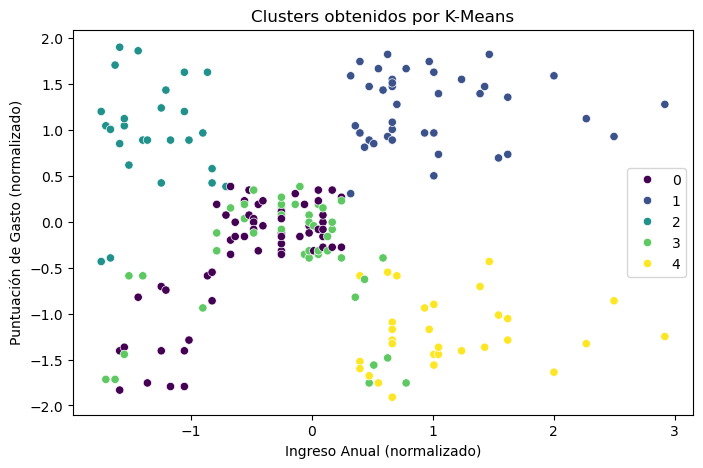

In [141]:
# Paso 6: Visualización de los resultados
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=kmeans_labels, palette='viridis')
plt.title("Clusters obtenidos por K-Means")
plt.xlabel("Ingreso Anual (normalizado)")
plt.ylabel("Puntuación de Gasto (normalizado)")
plt.show()

In [179]:
# Paso 7: Interpretación
print("Interpretación: Los clusters identifican grupos de clientes con patrones de gasto similares según ingreso y edad.")

Interpretación: Los clusters identifican grupos de clientes con patrones de gasto similares según ingreso y edad.
